## Introduction to Logistic Regression

Logistic regression is an extremely popular artificial intelligence approach that is used for classification tasks. It is widely adopted in real-life machine learning production settings.

## What is Logistic Regression?

- Logistic Regression is a popular statistical model used for binary classification, that is for predictions of the type this or that, yes or no, A or B, etc.
- Logistic regression can, however, be used for multiclass classification, but here we will focus on its simplest application.
- It is one of the most frequently used machine learning algorithms for binary classifications that translates the input to 0 or 1.  For example, 

        0: negative class
        1: positive class

**Some examples of classification are mentioned below:**

- Email: spam / not spam
- Online transactions: fraudulent / not fraudulent
- Tumor: malignant / not malignant

**Let us look at the issues we encounter in Linear Regression.**

### Issue 1 of Linear Regression

As you can see on the graph mentioned below, the prediction would leave out malignant tumors as the gradient becomes less steep with an additional data point on the extreme right.

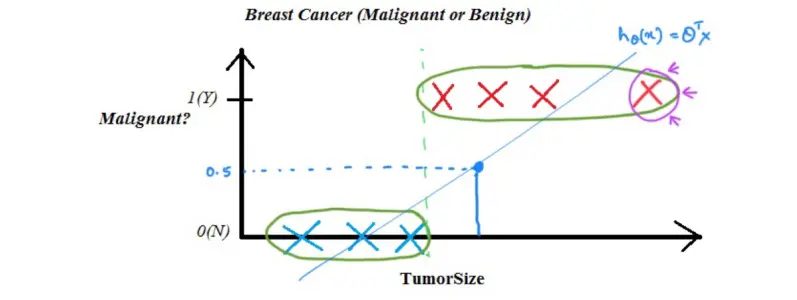

### Issue 2 of Linear Regression

1. Hypothesis can be larger than 1 or smaller than zero
2. Hence, we have to use logistic regression

## Logistic Regression Hypothesis

**The logistic regression classifier can be derived by analogy to the linear regression hypothesis which is:**


                            Linear regression hypothesis

**However, the logistic regression hypothesis generalizes from the linear regression hypothesis in that it uses the logistic function:**

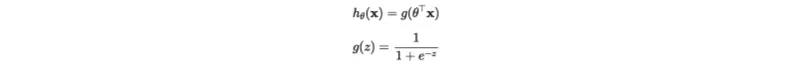

**The result is the logistic regression hypothesis:**

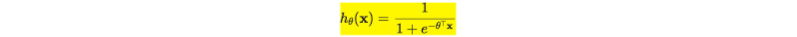

The function g(z) is the logistic function, also known as the sigmoid function.

The logistic function has asymptotes at 0 and 1, and it crosses the y-axis at 0.5.

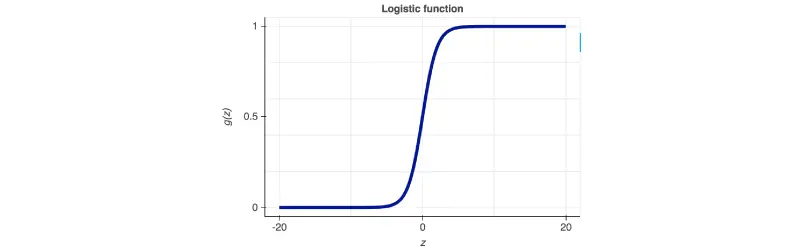

## How does Logistic Regression work?

Logistic Regression uses a more complex cost function than Linear Regression, this cost function is called the ‘Sigmoid function’ or also known as the ‘logistic function’ instead of a linear function.

The hypothesis of logistic regression tends to limit the cost function between 0 and 1. Therefore linear functions fail to represent it as it can have a value greater than 1 or less than 0 which is not possible as per the hypothesis of logistic regression.

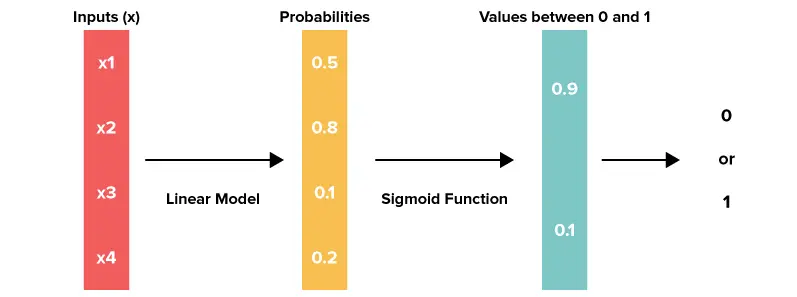

Sigmoid function maps any real value into another value between 0 and 1. In machine learning, we use sigmoid to map predictions to probabilities.

### Formula:

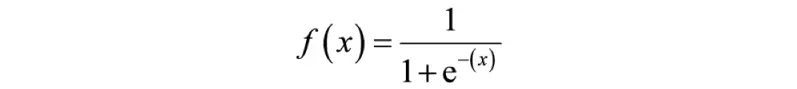

***Where,***

    f(x) = output between 0 and 1 (probability estimate)
    x = input to the function
    e = base of natural log

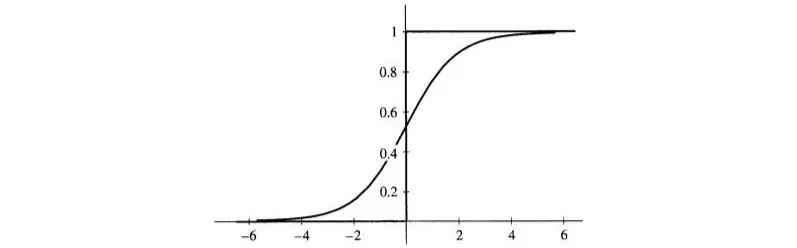

## Decision Boundary

The prediction function returns a probability score between 0 and 1. If you want to map the discrete class (true/false, yes/no), you will have to select a threshold value above which you will be classifying values into class 1 and below the threshold value into class 2.

    p≥0.5,class=1
    p<0.5,class=0

For example, suppose the threshold value is 0.5 and your prediction function returns 0.7, it will be classified as positive. If your predicted value is 0.2, which is less than the threshold value, it will be classified as negative. For logistic regression with multiple classes we could select the class with the highest predicted probability.  

Our aim should be to maximize the likelihood that a random data point gets classified correctly, which is called Maximum Likelihood Estimation. Maximum Likelihood Estimation is a general approach to estimating parameters in statistical models. The likelihood can be maximized using an optimization algorithm. Newton’s Method is one such algorithm which can be used to find maximum (or minimum) of many different functions, including the likelihood function. Other than Newton’s Method, you can also use Gradient Descent.
Cost Function

We have covered Cost Function earlier in the blog on Linear Regression. In brief, a cost function is created for optimization purpose so that we can minimize it and create a model with minimum error.

## Cost function for Logistic Regression are:

- Cost(hθ(x),y) = −log(hθ(x))   if y = 1
- Cost(hθ(x),y) = −log(1−hθ(x))   if y = 0

**The above functions can be written together as:**

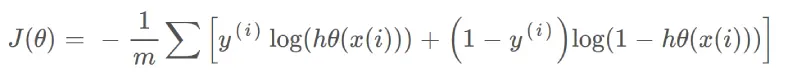

## Gradient Descent

After finding out the cost function for Logistic Regression, our job should be to minimize it i.e. min J(θ). The cost function can be reduced by using Gradient Descent.

**The general form of gradient descent:**

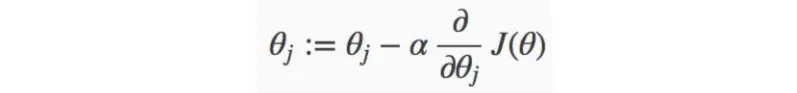

**The derivative part can be solved using calculus so the equation comes to:**

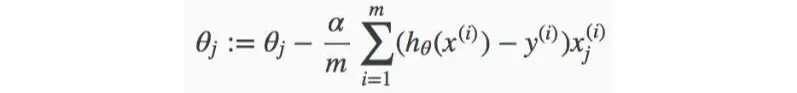

## When to use Logistic Regression?

Logistic Regression is used when the input needs to be separated into “two regions” by a linear boundary. The data points are separated using a linear line as shown:

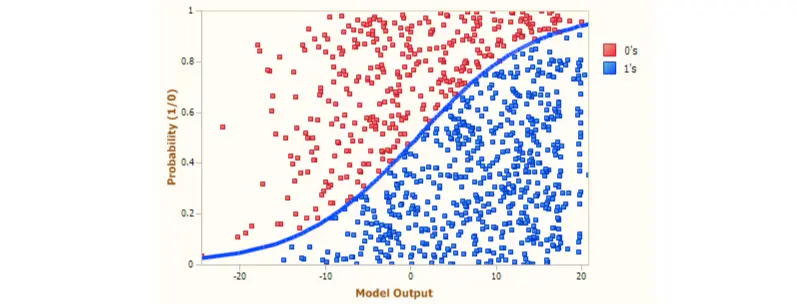

**Based on the number of categories, Logistic regression can be classified as:**

- binomial: target variable can have only 2 possible types: “0” or “1” which may represent “win” vs “loss”, “pass” vs “fail”, “dead” vs “alive”, etc.
- multinomial: target variable can have 3 or more possible types which are not ordered(i.e. types have no quantitative significance) like “disease A” vs “disease B” vs “disease C”.
- ordinal: it deals with target variables with ordered categories. For example, a test score can be categorized as:“very poor”, “poor”, “good”, “very good”. Here, each category can be given a score like 0, 1, 2, 3.

# 1. Importing necessary libraries

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None) # displaying all rows and columns of a dataframe
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Reading the Breast Cancer Wisconsin (Diagnostic) Dataset

In [3]:
# reading the Breast Cancer Wisconsin (Diagnostic) Data Set
df = pd.read_csv('data.csv.xls')

# displaying top 5 instances of the dataset
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# 3. Dropping unwanted columns, 'id' and 'Unnamed: 32' are dropped

In [4]:
# the unwanted columns, 'id' and 'Unnamed: 32' are dropped
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

## 4. Label Encoding of the Target Variable

In [5]:
# label-encoding of the target label, 'diagnosis' such that B(Benign) -> 0 and M (Malignant) -> 1
df['diagnosis'] = df['diagnosis'].map({'B':0, 'M':1})

## 5. Creating the Feature Set and Target Label variables

In [6]:
# spliting into X (features) and y (target label)
X = df.iloc[:, 1:]
y = df['diagnosis']

## 6. 80-20 splitting the dataset into Training Set and Test Set

In [7]:
# 80-20 splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.8,
                                                    test_size = 0.2, random_state = 42)

## 7. Feature Scaling of the features in the Training and Test Set

In [8]:
# feature scaling of the features in Training and Test Set
columns = X_train.columns
scalerx = StandardScaler()
X_train_scaled = scalerx.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = columns)

X_test_scaled = scalerx.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = columns)

## 8. Principal Component Analysis (PCA) to reduce the dimensionality of the data into 2 dimensions in both Training and Test Set

In [9]:
# Incremental Principal Component Analysis to select 2 features such that they explain as much variance as possible
pca = IncrementalPCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_scaled)

X_test_pca = pca.transform(X_test_scaled)

## 9. Plotting the Scatter-Plot of Training and Test Set

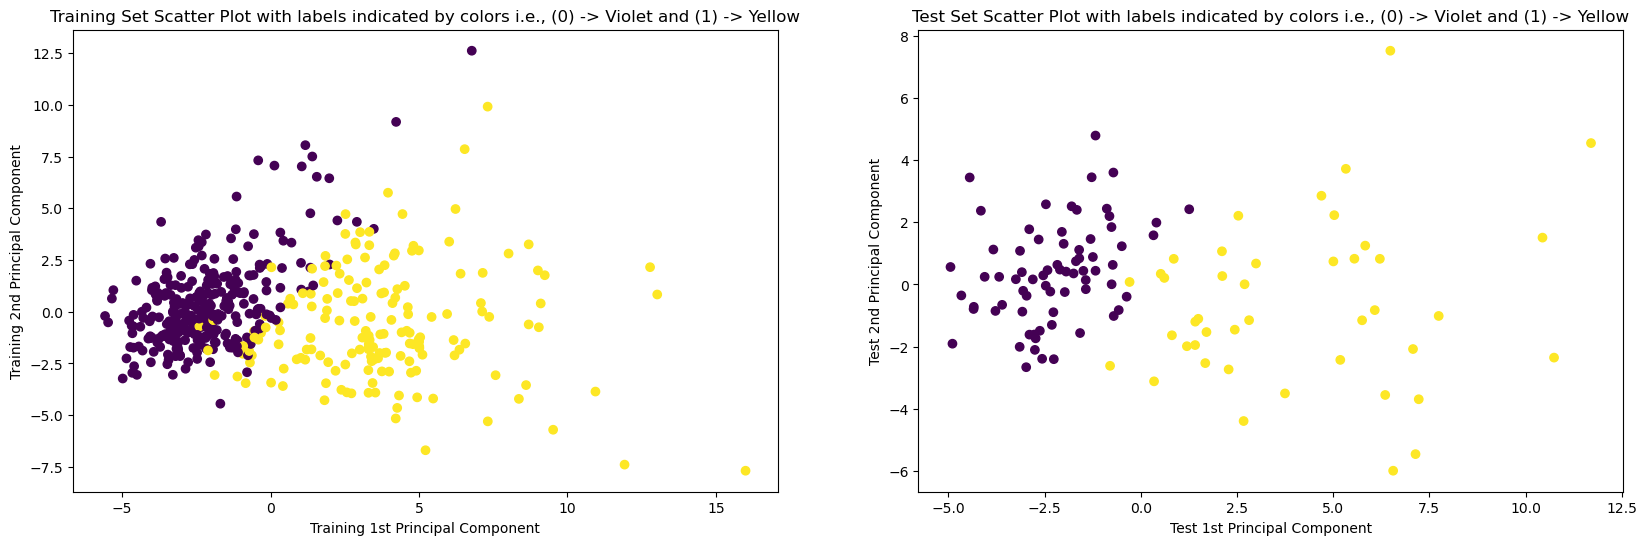

In [10]:
# Scatter Plot of Training and Test Set with labels indicated by colors
plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c = y_train)
plt.xlabel('Training 1st Principal Component')
plt.ylabel('Training 2nd Principal Component')
plt.title('Training Set Scatter Plot with labels indicated by colors i.e., (0) -> Violet and (1) -> Yellow')
plt.subplot(1, 2, 2)
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c = y_test)
plt.xlabel('Test 1st Principal Component')
plt.ylabel('Test 2nd Principal Component')
plt.title('Test Set Scatter Plot with labels indicated by colors i.e., (0) -> Violet and (1) -> Yellow')
plt.show()

## 10. Performing 5-Fold Grid-Search Cross Validation on Logistic Regression Classifier on the Training Set

In [11]:
# 5-Fold Grid-Search Cross Validation on Logistic Regression Classifier for tuning the hyper-parameter, C with Accuracy scoring
params = {'C':[0.01, 0.1, 1, 10, 100]}

clf = LogisticRegression()

folds = 5
model_cv = GridSearchCV(estimator = clf, 
                        param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds,
                        return_train_score=True,
                        verbose = 3)

model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ........C=0.01;, score=(train=0.929, test=0.901) total time=   0.0s
[CV 2/5] END ........C=0.01;, score=(train=0.934, test=0.912) total time=   0.0s
[CV 3/5] END ........C=0.01;, score=(train=0.920, test=0.956) total time=   0.0s
[CV 4/5] END ........C=0.01;, score=(train=0.929, test=0.934) total time=   0.0s
[CV 5/5] END ........C=0.01;, score=(train=0.931, test=0.912) total time=   0.0s
[CV 1/5] END .........C=0.1;, score=(train=0.951, test=0.923) total time=   0.0s
[CV 2/5] END .........C=0.1;, score=(train=0.937, test=0.934) total time=   0.0s
[CV 3/5] END .........C=0.1;, score=(train=0.942, test=0.956) total time=   0.0s
[CV 4/5] END .........C=0.1;, score=(train=0.942, test=0.934) total time=   0.0s
[CV 5/5] END .........C=0.1;, score=(train=0.940, test=0.945) total time=   0.0s
[CV 1/5] END ...........C=1;, score=(train=0.959, test=0.923) total time=   0.0s
[CV 2/5] END ...........C=1;, score=(train=0.942,

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, return_train_score=True,
             scoring='accuracy', verbose=3)

## 11. Getting the Best Hyper-parameter from the Grid-Search performed above

In [12]:
# getting the best hyper-parameter
print(model_cv.best_params_) 

{'C': 10}


## 12. Re-training the Logistic Regression Classifier with the best hyper-parameter, C = 10 (obtained above)

In [13]:
# re-training the Logistic Regression Classifier with the best hyper-parameter, C = 10
model = LogisticRegression(C = 10).fit(X_train_pca, y_train)

## 13. Obtaining the Training Set and Test Set Predictions given by the model, trained in the last step

In [14]:
# getting the Training Set Predictions
y_train_pred = model.predict(X_train_pca)

# getting the Test Set Predictions
y_test_pred = model.predict(X_test_pca)

## 14. Performance Analysis of the Logistic Regression Model in terms of Accuracy, Precision, Recall and F1-Score

In [15]:
# Getting the Training and Test Accuracy of the Logistic Regression Model
print('Training Accuracy of the Model: ', metrics.accuracy_score(y_train, y_train_pred))
print('Test Accuracy of the Model: ', metrics.accuracy_score(y_test, y_test_pred))
print()

# Getting the Training and Test Precision of the Logistic Regression Model
print('Training Precision of the Model: ', metrics.precision_score(y_train, y_train_pred))
print('Test Precision of the Model: ', metrics.precision_score(y_test, y_test_pred))
print()

# Getting the Training and Test Recall of the Logistic Regression Model
print('Training Recall of the Model: ', metrics.recall_score(y_train, y_train_pred))
print('Test Recall of the Model: ', metrics.recall_score(y_test, y_test_pred))
print()

# Getting the Training and Test F1-Score of the Logistic Regression Model
print('Training F1-Score of the Model: ', metrics.f1_score(y_train, y_train_pred))
print('Test F1-Score of the Model: ', metrics.f1_score(y_test, y_test_pred))
print()

Training Accuracy of the Model:  0.9516483516483516
Test Accuracy of the Model:  0.9912280701754386

Training Precision of the Model:  0.9401197604790419
Test Precision of the Model:  1.0

Training Recall of the Model:  0.9289940828402367
Test Recall of the Model:  0.9767441860465116

Training F1-Score of the Model:  0.9345238095238095
Test F1-Score of the Model:  0.988235294117647



## 15. Plotting the Decision Boundary given by the Trained Logistic Regression both on the Training and Test sets

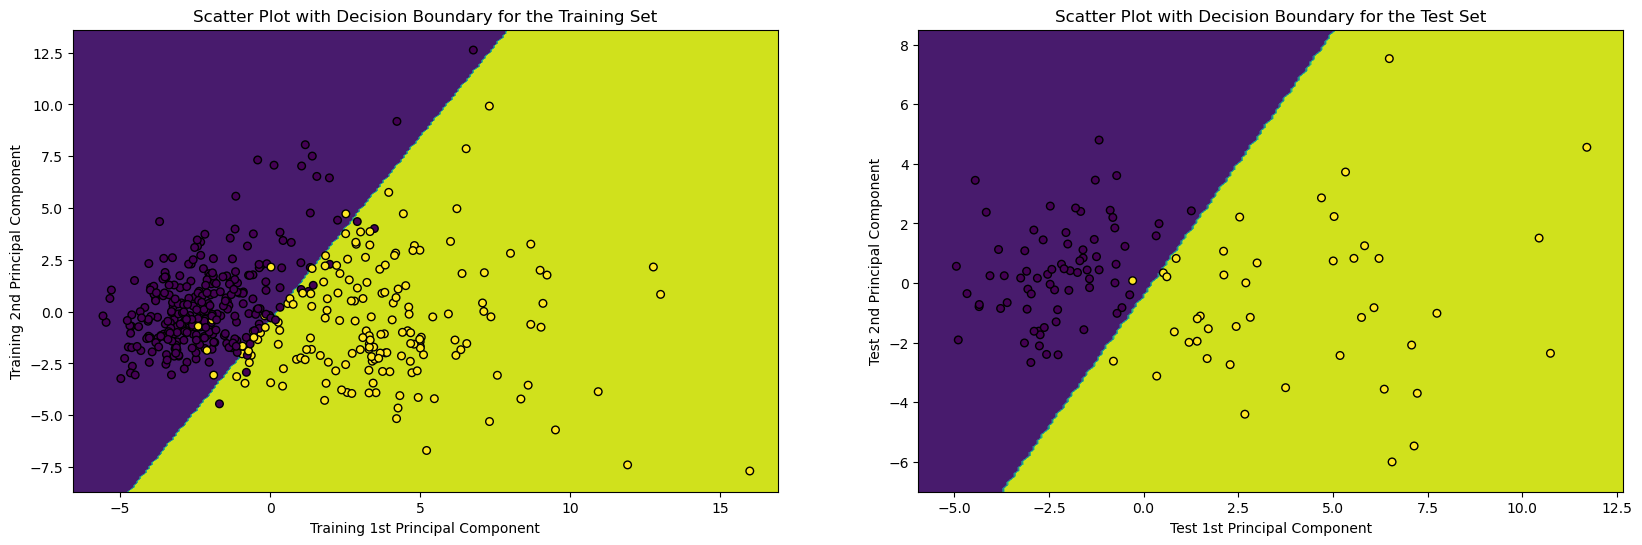

In [16]:
# plotting the decision boundary in the scatter plot of Training and Test Set with labels indicated by colors
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1

xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                 np.arange(y_min, y_max, 0.1))

Z_train = model.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
Z_train = Z_train.reshape(xx_train.shape)


x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1

xx_test, yy_test = np.meshgrid(np.arange(x_min, x_max, 0.1),
                               np.arange(y_min, y_max, 0.1))

Z_test = model.predict(np.c_[xx_test.ravel(), yy_test.ravel()])
Z_test = Z_test.reshape(xx_test.shape)



plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.contourf(xx_train, yy_train, Z_train)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c = y_train, s = 30, edgecolor = 'k')
plt.xlabel('Training 1st Principal Component')
plt.ylabel('Training 2nd Principal Component')
plt.title('Scatter Plot with Decision Boundary for the Training Set')

plt.subplot(1, 2, 2)
plt.contourf(xx_test, yy_test, Z_test)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c = y_test, s = 30, edgecolor = 'k')
plt.xlabel('Test 1st Principal Component')
plt.ylabel('Test 2nd Principal Component')
plt.title('Scatter Plot with Decision Boundary for the Test Set')
plt.show()